# The Sparks Foundation - Data Science & Business Analytics Internship



# Task 1- Prediction using Supervised ML
 In this task we will predict the percentage of an student based on the no. of study hours.

# Steps :
    1.Importing the dataset
    2.Visualizing the dataset
    3.Data preparation
    4.Training the algorithm
    5.Visualizing the model
    6.Making predictions
    7.Evaluating the model
    
   # Author - Rutuja Gadhave 



# Step 1 - Importing the dataset

In [1]:
#Importing required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#To ignore warnings
import warnings as wg
wg.filterwarnings("ignore")

In [2]:
#Reading data from remote link

url="https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv"
df=pd.read_csv(url)

In [3]:
#let's observe dataset

df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
df.tail()

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


In [5]:
#To find number of rows and colums

df.shape

(25, 2)

In [6]:
#To find more information about our dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [7]:
#Description of dataset

df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [8]:
#To check null values  in dataset

df.isnull().sum()

Hours     0
Scores    0
dtype: int64

# Step 2 - Visualizing the dataset

Here we will plot the dataset to check whether we can observe any relation between the two variabless or not .

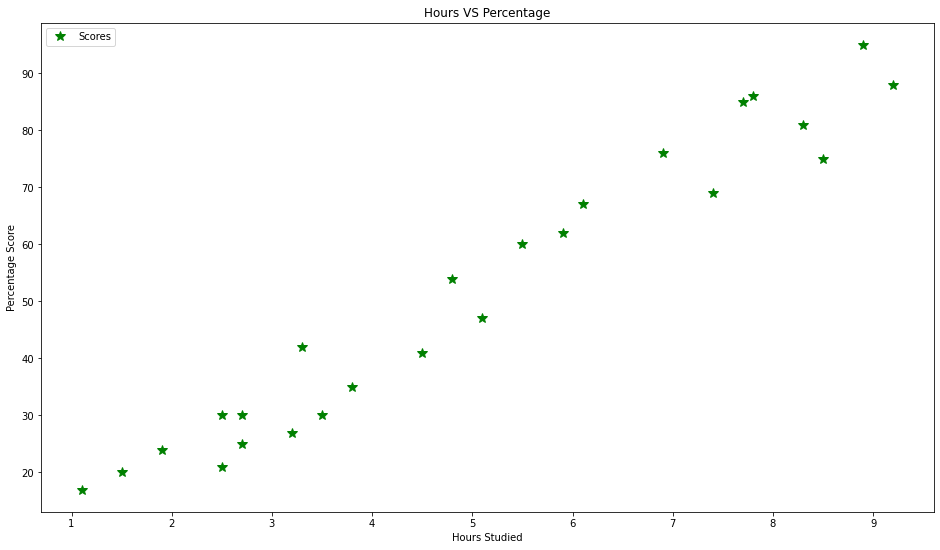

In [9]:
#Plotting the dataset

plt.rcParams["figure.figsize"]=[16,9]
df.plot(x='Hours',  y='Scores' , style='*' , color='green' , markersize=10)
plt.title("Hours VS Percentage")
plt.xlabel("Hours Studied")
plt.ylabel("Percentage Score")
plt.show()

We can  find from above graph that there is a relationship between "Hours Studied" and "Percentage Score" . So , we can use linear regression supervised machine model on it to predict further values .

In [10]:
# we can also use .corr to determine the  corelation between the variables
df.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


# Step 3 - Data preparation
Here we will split data into "features"(inputs) and "labels"(outputs)  After that we will split the whole dataset into two parts - testing data and training data.

In [11]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [13]:
#Dividing data

x=df.iloc[:, :1].values
y=df.iloc[:, 1:].values

In [14]:
x

array([[2.5],
       [5.1],
       [3.2],
       [8.5],
       [3.5],
       [1.5],
       [9.2],
       [5.5],
       [8.3],
       [2.7],
       [7.7],
       [5.9],
       [4.5],
       [3.3],
       [1.1],
       [8.9],
       [2.5],
       [1.9],
       [6.1],
       [7.4],
       [2.7],
       [4.8],
       [3.8],
       [6.9],
       [7.8]])

In [15]:
y

array([[21],
       [47],
       [27],
       [75],
       [30],
       [20],
       [88],
       [60],
       [81],
       [25],
       [85],
       [62],
       [41],
       [42],
       [17],
       [95],
       [30],
       [24],
       [67],
       [69],
       [30],
       [54],
       [35],
       [76],
       [86]], dtype=int64)

In [16]:
#Splitting data

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2 ,random_state =0)

# Step 4 - Training the algorithm

We have splitted our data into training and testing sets ,now we will train our model.

In [17]:
from sklearn.linear_model import LinearRegression

model =  LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

# Step 5 - Visualizing the model
Now, we will visualize our data.

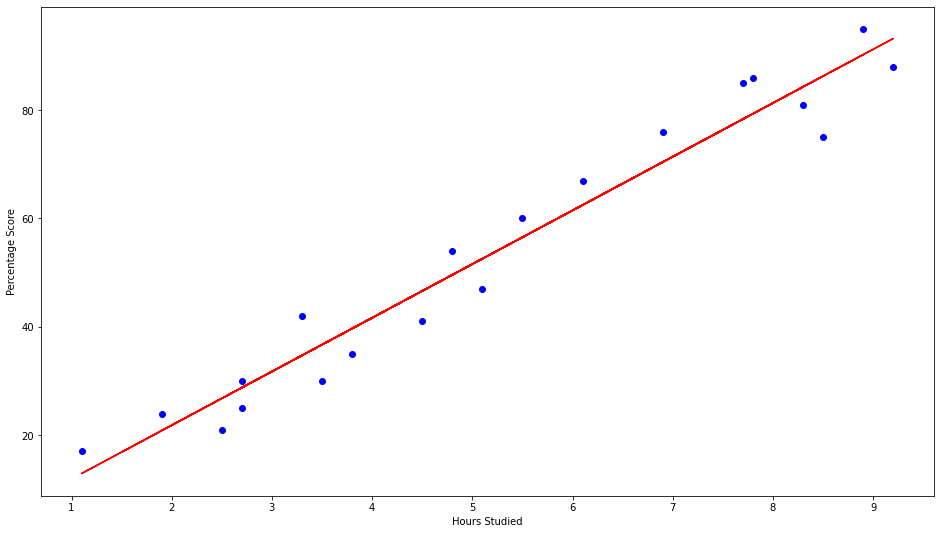

In [18]:
line = model.coef_*x + model.intercept_

#Plotting for training data

plt.rcParams["figure.figsize"]=[16,9]
plt.scatter(x_train, y_train, color="blue")
plt.plot(x, line, color="red")
plt.xlabel("Hours Studied")
plt.ylabel("Percentage Score")
plt.show()

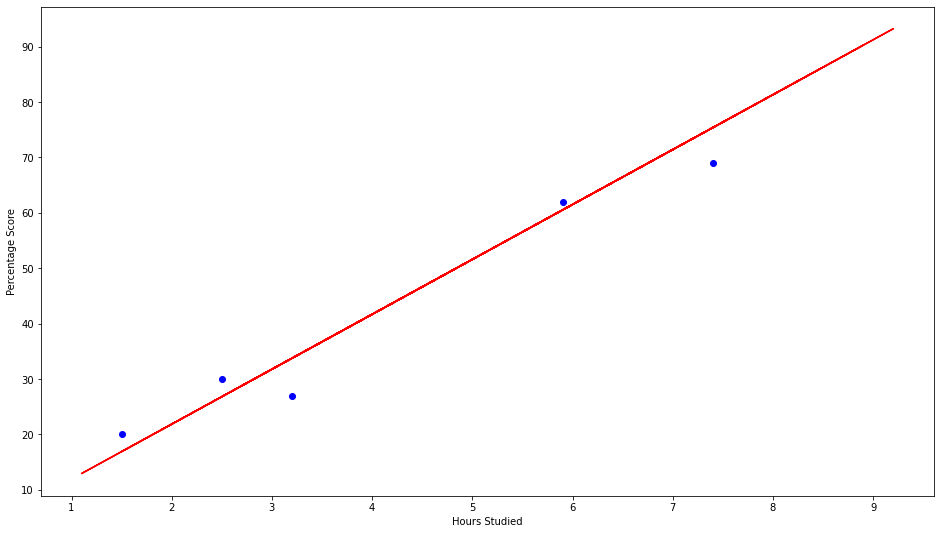

In [20]:
#Plotting for testing data

plt.rcParams["figure.figsize"]=[16,9]
plt.scatter(x_test, y_test, color="blue")
plt.plot(x, line, color="red")
plt.xlabel("Hours Studied")
plt.ylabel("Percentage Score")
plt.show()

# Step 6 - Making predictions

Now , we have trained our algorithm so, let's make predictions.

In [21]:
 #test data(hours)
print(x_test)

 #predicting score
y_pred = model.predict(x_test)

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [22]:
y_test #Actual values

array([[20],
       [27],
       [69],
       [30],
       [62]], dtype=int64)

In [25]:
y_pred #Predicted values

array([[16.88414476],
       [33.73226078],
       [75.357018  ],
       [26.79480124],
       [60.49103328]])

In [26]:
#Comparing actual vs predicted 

comp=pd.DataFrame({'Actual': [y_test],'Prdicted':[y_pred]})
comp

,Actual,Prdicted
0,"[[20], [27], [69], [30], [62]]","[[16.884144762398037], [33.73226077948984], [7..."


In [27]:
#Tesing  own data
hours=9.25
own_pred = model.predict([[hours]])
print("Predicted score if person studies for ",hours,"hours is : ",own_pred[0])

Predicted score if person studies for  9.25 hours is :  [93.69173249]


# Step 7 - Evaluating the model

Here ,we will evaluate our trained model  by calculting mean absolute  error.


In [28]:
from sklearn import metrics
print("Mean Absolute Error :  ",metrics.mean_absolute_error(y_test,y_pred))

Mean Absolute Error :   4.183859899002975
